In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [25]:
# creating a dataframe from a csv file which has been downloaded from the internet
df = pd.read_csv('datasets/player_playing_time.csv')

In [26]:
df

,Rk,Player,Pos,Squad,Age,Born,MP,Min,Mn/MP,Min%,...,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,Matches
0,1,Amir Abrashi,MF,al Albania,33,1990,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
1,2,Che Adams,FW,sct Scotland,27,1996,3,209.0,70.0,77.4,...,4.0,-3.0,-1.29,1.66,0.7,2.8,-2.0,-0.88,1.23,Matches
2,3,Michel Aebischer,DF,ch Switzerland,27,1997,5,476.0,95.0,99.2,...,4.0,4.0,0.76,0.76,6.5,4.9,1.6,0.30,-5.09,Matches
3,4,Arlind Ajeti,DF,al Albania,30,1993,3,270.0,90.0,100.0,...,5.0,-2.0,-0.67,NaN,2.4,5.7,-3.2,-1.07,NaN,Matches
4,5,Manuel Akanji,DF,ch Switzerland,28,1995,5,480.0,96.0,100.0,...,4.0,4.0,0.75,NaN,6.7,4.9,1.8,0.37,0.37,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,617,Budu Zivzivadze,"FW,MF",ge Georgia,29,1994,2,18.0,9.0,5.0,...,2.0,-2.0,-10.00,-9.74,0.2,1.9,-1.6,-8.20,-6.81,Matches
617,618,Steven Zuber,MF,ch Switzerland,32,1991,2,77.0,39.0,16.0,...,1.0,0.0,0.00,-0.89,1.3,0.9,0.4,0.70,0.40,Matches
618,619,Martín Zubimendi,MF,es Spain,24,1999,4,141.0,35.0,21.4,...,1.0,2.0,1.28,-0.28,3.0,0.9,2.1,1.36,0.70,Matches
619,620,Oleksandr Zubkov,FW,ua Ukraine,27,1996,1,24.0,24.0,8.9,...,0.0,1.0,3.75,4.85,0.4,0.2,0.1,0.54,0.51,Matches


In [27]:
# get the list of columns in the dataframe
df.columns

Index(['Rk', 'Player', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Min', 'Mn/MP',
       'Min%', '90s', 'Starts', 'Mn/Start', 'Compl', 'Subs', 'Mn/Sub', 'unSub',
       'PPM', 'onG', 'onGA', '+/-', '+/-90', 'On-Off', 'onxG', 'onxGA',
       'xG+/-', 'xG+/-90', 'On-Off.1', 'Matches'],
      dtype='object')

In [28]:
df.rename(columns={'Min': 'Minutes_played'}, inplace=True)

In [29]:
# Replace NaN values in Minutes_played column with 0 (its not that data is missing its just they did not play so we put 0 minutes instead of null value)
df['Minutes_played'] = df['Minutes_played'].fillna(0)
df

,Rk,Player,Pos,Squad,Age,Born,MP,Minutes_played,Mn/MP,Min%,...,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,Matches
0,1,Amir Abrashi,MF,al Albania,33,1990,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
1,2,Che Adams,FW,sct Scotland,27,1996,3,209.0,70.0,77.4,...,4.0,-3.0,-1.29,1.66,0.7,2.8,-2.0,-0.88,1.23,Matches
2,3,Michel Aebischer,DF,ch Switzerland,27,1997,5,476.0,95.0,99.2,...,4.0,4.0,0.76,0.76,6.5,4.9,1.6,0.30,-5.09,Matches
3,4,Arlind Ajeti,DF,al Albania,30,1993,3,270.0,90.0,100.0,...,5.0,-2.0,-0.67,NaN,2.4,5.7,-3.2,-1.07,NaN,Matches
4,5,Manuel Akanji,DF,ch Switzerland,28,1995,5,480.0,96.0,100.0,...,4.0,4.0,0.75,NaN,6.7,4.9,1.8,0.37,0.37,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,617,Budu Zivzivadze,"FW,MF",ge Georgia,29,1994,2,18.0,9.0,5.0,...,2.0,-2.0,-10.00,-9.74,0.2,1.9,-1.6,-8.20,-6.81,Matches
617,618,Steven Zuber,MF,ch Switzerland,32,1991,2,77.0,39.0,16.0,...,1.0,0.0,0.00,-0.89,1.3,0.9,0.4,0.70,0.40,Matches
618,619,Martín Zubimendi,MF,es Spain,24,1999,4,141.0,35.0,21.4,...,1.0,2.0,1.28,-0.28,3.0,0.9,2.1,1.36,0.70,Matches
619,620,Oleksandr Zubkov,FW,ua Ukraine,27,1996,1,24.0,24.0,8.9,...,0.0,1.0,3.75,4.85,0.4,0.2,0.1,0.54,0.51,Matches


In [30]:
# I want to keep only country name not abbreviation
df['Squad'] = df['Squad'].str.split().str[1]

In [31]:
# keep the columns that are relevant to the analysis
df = df[['Player', 'Squad', 'Age', 'Minutes_played']]

In [32]:
df

,Player,Squad,Age,Minutes_played
0,Amir Abrashi,Albania,33,0.0
1,Che Adams,Scotland,27,209.0
2,Michel Aebischer,Switzerland,27,476.0
3,Arlind Ajeti,Albania,30,270.0
4,Manuel Akanji,Switzerland,28,480.0
...,...,...,...,...
616,Budu Zivzivadze,Georgia,29,18.0
617,Steven Zuber,Switzerland,32,77.0
618,Martín Zubimendi,Spain,24,141.0
619,Oleksandr Zubkov,Ukraine,27,24.0


In [33]:
# average age of the players for the whole tournament
average_age = df['Age'].mean()
average_age

26.624798711755233

In [34]:
# average age of the players in each squad
average_age_per_squad = df.groupby('Squad')['Age'].mean()
average_age_per_squad

Squad
Albania        26.807692
Austria        26.346154
Belgium        26.166667
Croatia        27.346154
Czechia        25.115385
Denmark        27.307692
England        25.576923
France         26.440000
Georgia        26.615385
Germany        28.038462
Hungary        27.038462
Italy          25.961538
Netherlands    25.769231
Poland         27.269231
Portugal       26.615385
Romania        26.461538
Scotland       27.923077
Serbia         27.038462
Slovakia       26.923077
Slovenia       26.846154
Spain          26.615385
Switzerland    27.384615
Türkiye        25.307692
Ukraine        26.038462
Name: Age, dtype: float64

Weighted_average = sum(value * weight) / sum (weight)

In [35]:
# average age of the players in each squad but weighted depending on the number of minutes played
weighted_avg_age_per_squad = df.groupby('Squad').apply(lambda x: (x['Age'] * x['Minutes_played']).sum() / x['Minutes_played'].sum())
weighted_avg_age_per_squad.name = 'Weighted_avg_age'
weighted_avg_age_per_squad

Squad
Albania        26.307071
Austria        26.457323
Belgium        27.200505
Croatia        28.082155
Czechia        26.335749
Denmark        27.509343
England        25.999209
France         26.247368
Georgia        26.139394
Germany        28.391288
Hungary        26.815825
Italy          26.103030
Netherlands    26.362963
Poland         26.831987
Portugal       27.510339
Romania        27.123485
Scotland       27.713308
Serbia         27.063636
Slovakia       29.328904
Slovenia       26.385781
Spain          26.375534
Switzerland    28.817614
Türkiye        25.521414
Ukraine        25.151178
Name: Weighted_avg_age, dtype: float64

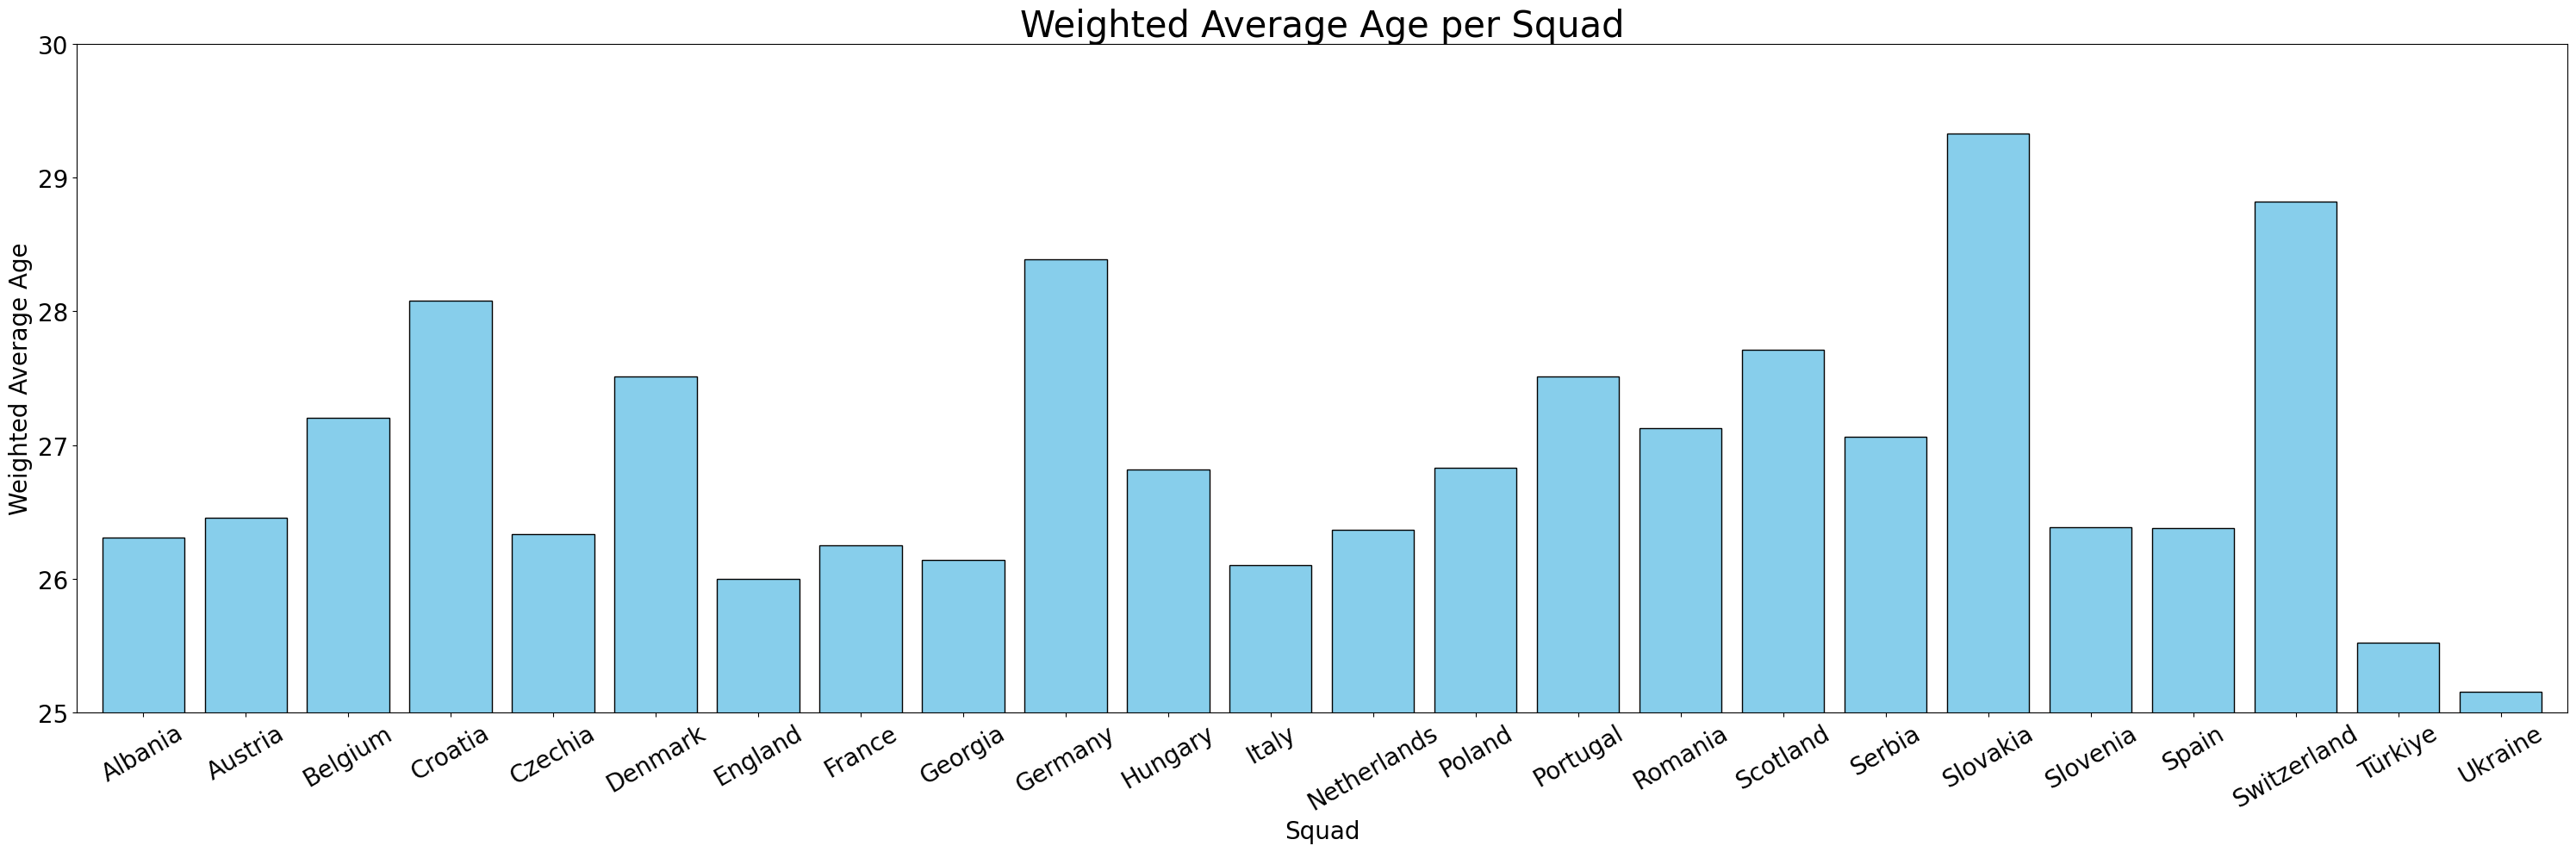

In [68]:
# Plot the results
plt.figure(figsize=(30, 10))
weighted_avg_age_per_squad.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)

# Add labels and title
plt.title('Weighted Average Age per Squad', fontsize=30)
plt.xlabel('Squad', fontsize=20)
plt.ylabel('Weighted Average Age', fontsize=20)
plt.xticks(rotation=30, fontsize=20)
plt.yticks(fontsize=20)
# to get better visual of the data, set the y-axis limits to 25 and 30
plt.ylim(25, 30)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
df2 = pd.read_csv('datasets/euro2024_standings.csv')

In [38]:
# Merge df2 with weighted_avg_age_per_squad
# Joining on Squad column from df2 and index from weighted_avg_age_per_squad
df2 = df2.merge(weighted_avg_age_per_squad, left_on='Squad', right_index=True)

In [39]:
df2

,Rank,Squad,MP,W,D,L,GF,GA,GD,Pts,Weighted_avg_age
0,1,Spain,7,7,0,0,15,4,11,21,26.375534
1,2,England,7,3,3,1,8,6,2,12,25.999209
2,3,Netherlands,6,3,1,2,10,7,3,10,26.362963
3,4,France,6,2,3,1,4,3,1,9,26.247368
4,5,Germany,5,3,1,1,11,4,7,10,28.391288
5,6,Switzerland,5,2,3,0,8,4,4,9,28.817614
6,7,Türkiye,5,3,0,2,8,8,0,9,25.521414
7,8,Portugal,5,2,2,1,5,3,2,8,27.510339
8,9,Austria,4,2,0,2,7,5,2,6,26.457323
9,10,Slovenia,4,0,4,0,2,2,0,4,26.385781


In [57]:
# Perform linear regression
result = linregress(df2['Rank'], df2['Weighted_avg_age'])

# Calculate regression line values
# y = mx + b
regression_line = result.slope * df2['Rank'] + result.intercept


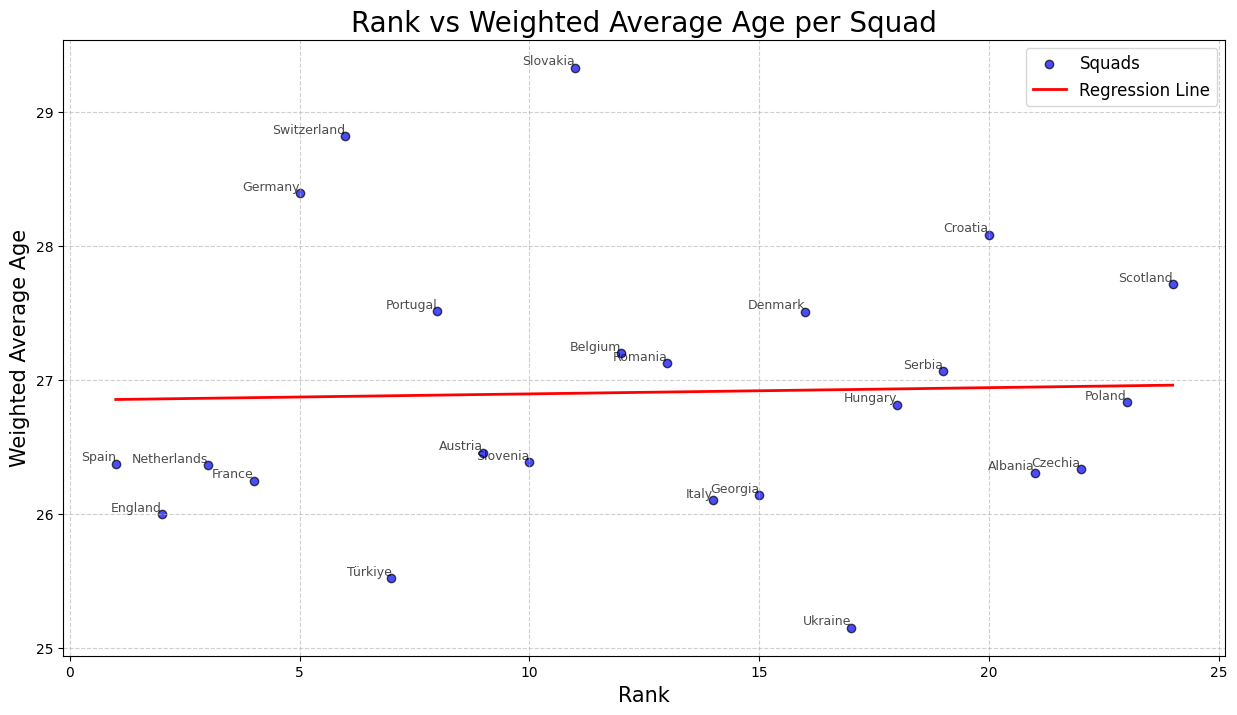

In [67]:
# Plot the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(df2['Rank'], df2['Weighted_avg_age'], color='blue', alpha=0.7, edgecolors='k', label='Squads')

# Plot the regression line
plt.plot(df2['Rank'], regression_line, color='red', linewidth=2, label='Regression Line')

# Add labels, title, and legend
plt.title('Rank vs Weighted Average Age per Squad', fontsize=20)
plt.xlabel('Rank', fontsize=15)
plt.ylabel('Weighted Average Age', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Annotate each point with squad names
for i, row in df2.iterrows():
    plt.text(row['Rank'], row['Weighted_avg_age'], row['Squad'], fontsize=9, ha='right', va='bottom', alpha=0.7)

# Show the plot
plt.show()


In [56]:
print(f"Correlation Coefficient: {result.rvalue:.2f}")


Correlation Coefficient: 0.03
